<a href="https://colab.research.google.com/github/sahug/python-data-structure/blob/main/Python%20Basics%20-%20Pointers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Python Basics - Pointers**

**Two are better than one if they act as one.**

**Steps in two pointer approach**: The two-pointer approach has three main steps:

**Pointer Initialization** — Starting points. Pointers can be at any place depending upon what we are trying to achieve. In the left part of the pic, we have both pointers starting at the same position i.e. start of the linked list. In the right part of the pic, we have pointers at extreme ends one at starting index and another one at the last index.

**Pointer movement** — This will decide how we converge towards the solution. Pointer can move in the same direction (left in above pic) or they can move in the opposite direction (right in the above pic). Also in the left part of the pic, we have different increments for the pointers(top (slow) with 1 unit bottom (fast) with 2 units).

**Stop condition** — This decides when do we stop. In the left part, we continue till we reach a node whose next element is None. In the right one, we continue till our start is less than the end (i <j).

**Problem No. 1:** Reverse an array in place.

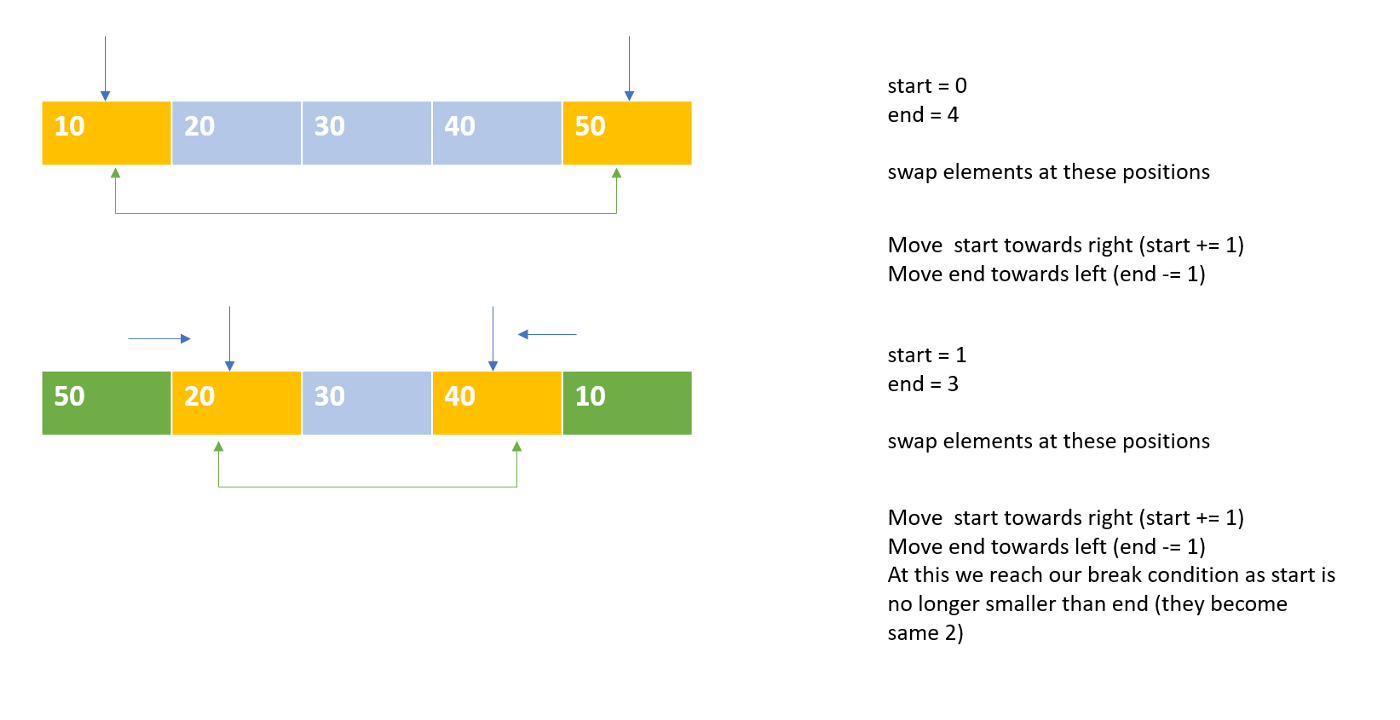

In [5]:
def reverseArray(array):
  start, end = 0, len(array) - 1
  while start<end:
    array[start], array[end] = array[end], array[start]
    start += 1
    end -= 1

array = [10, 20, 30, 40, 50]      
reverseArray(array)
print(array)


[50, 40, 30, 20, 10]


**Problem No. 2:** Given an integer array sorted in non-decreasing order, return an array of the squares of each number sorted in non-decreasing order.

```
Input: [-4, -3, 0, 1, 4, 10]
Output: [0, 1, 9, 16, 16, 100]
```

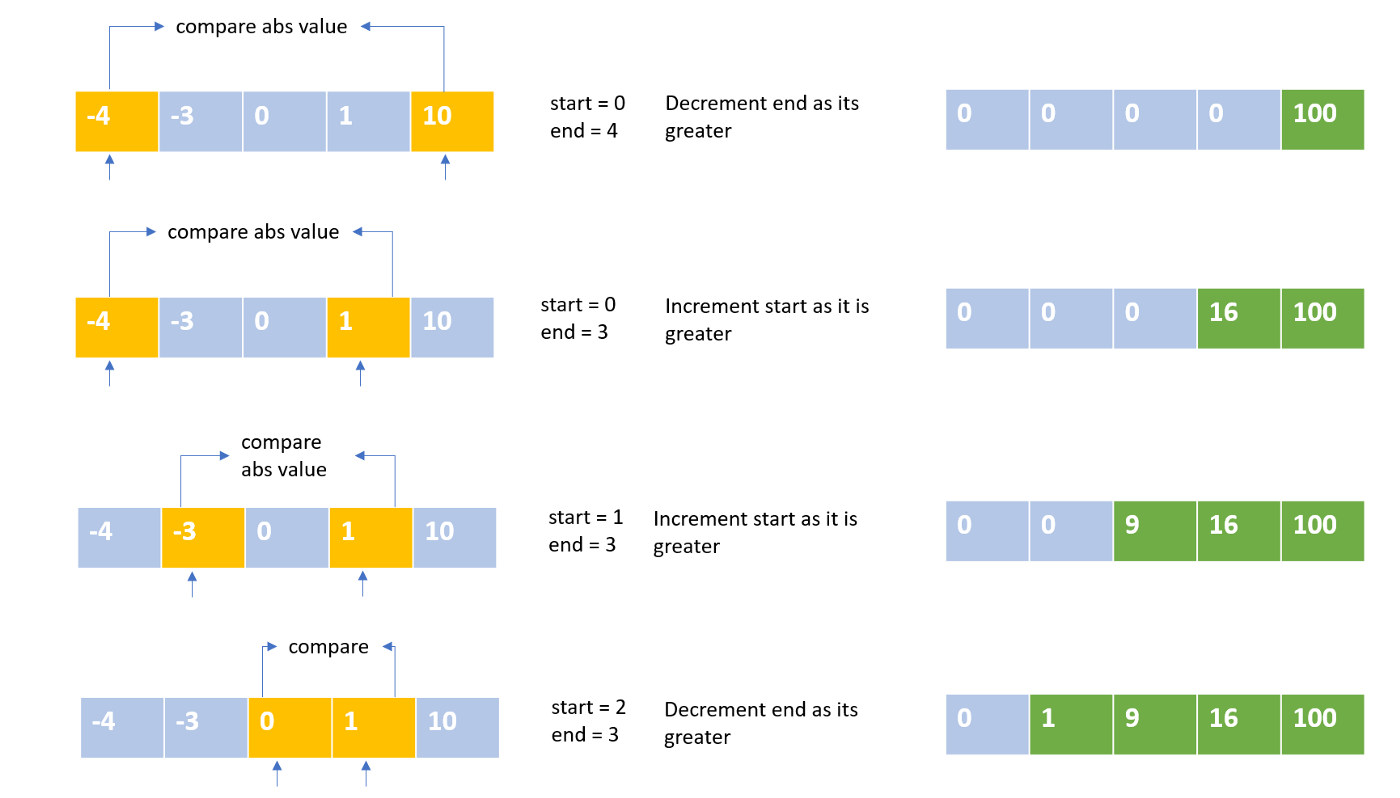

In [6]:
def sortedSquares(nums):
  n = len(nums)
  start, end = 0, n - 1
  res = [0]*n
  idx = n - 1

  while end>-1 and idx>-1:
    if abs(nums[start]) > abs(nums[end]):
      res[idx] = nums[start] * nums[start]
      start += 1
    else:
      res[idx] = nums[end] * nums[end]
      end -= 1
    idx -= 1

  return res

array = [-4, -3, 0, 1, 4, 10]      
print(sortedSquares(array))

[0, 1, 9, 16, 16, 100]


**Problem No. 3:** Finding cycle in Linked list:


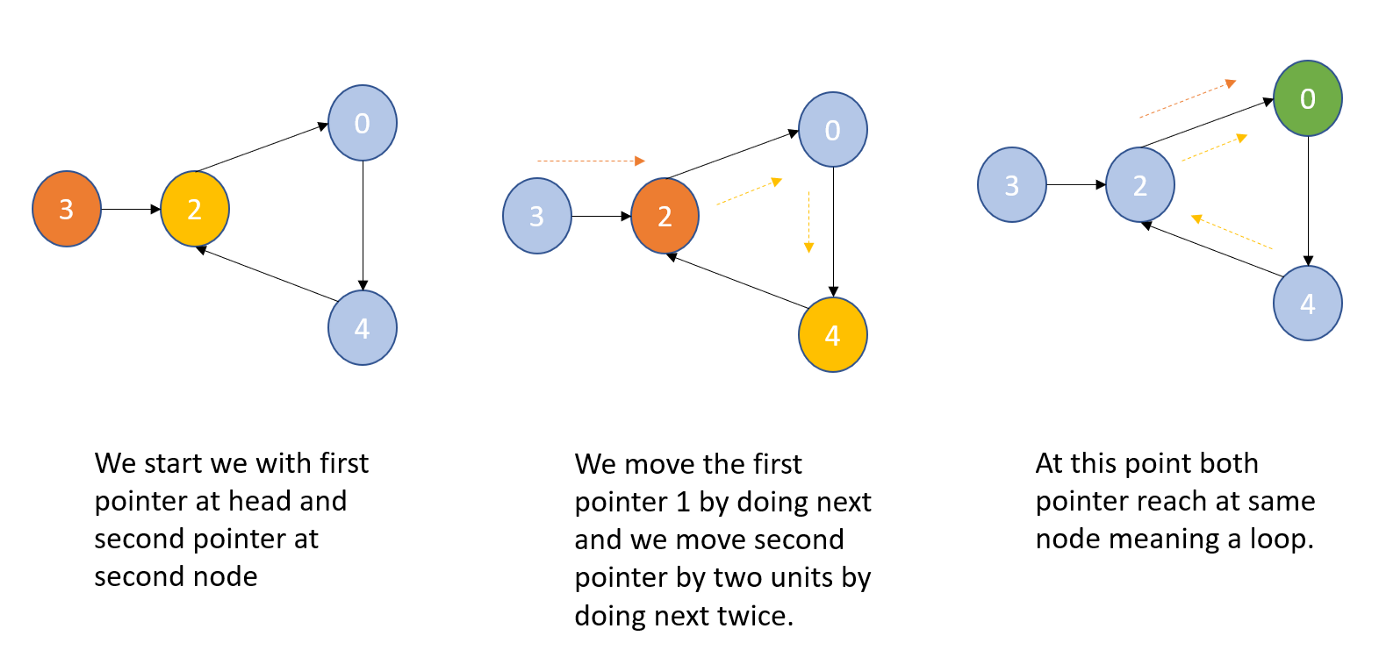

In [7]:
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None
    
    def __repr__(self):
        return str(self.val)

def hasCycle(head):
    
    if not head or not head.next:
        return False
    
    p1 = head
    p2 = head.next
    
    while p2:
        p2 = p2.next 

        if p2:
            p2 = p2.next 

        if not p2:
            return False
        
        p1 = p1.next
        
        if p1 == p2:
            return True

lt = [ListNode(item) for item in [3,2,0,-4]]
head = lt[0]
head.next = lt[1]
lt[1].next= lt[2]
lt[2].next = lt[3]
lt[3].next = lt[1]
    
print(hasCycle(head))

True


**Problem No. 4:** Given a string `s`, find the length of the longest substring without repeating characters.

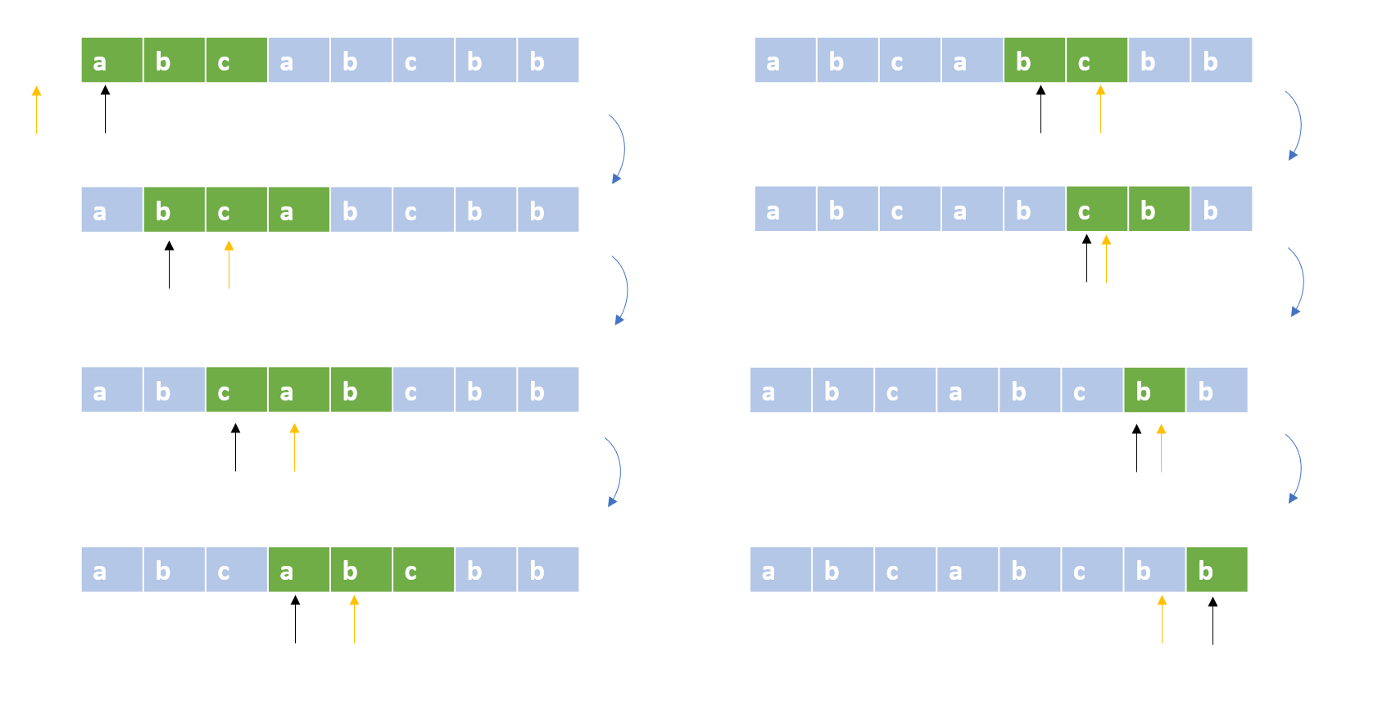

In [8]:
def lengthOfLongestSubstring(s):
    seen, n = set(), len(s)
    right, res = -1, 0
    for left in range(n):
        print(left, right, s[left: right+1], seen)
        while right + 1 < n and s[right+1] not in seen:
            right += 1
            seen.add(s[right])
        res = max(res, right - left + 1)
        print( s[left: right+1])
        if right == n - 1:
            break
        seen.discard(s[left])
    return res
    
print(lengthOfLongestSubstring("abcabcbb"))

0 -1  set()
abc
1 2 bc {'c', 'b'}
bca
2 3 ca {'a', 'c'}
cab
3 4 ab {'a', 'b'}
abc
4 5 bc {'c', 'b'}
bc
5 5 c {'c'}
cb
6 6 b {'b'}
b
7 6  set()
b
3


**Problem No. 5:** Given three sorted arrays A, B, and C of not necessarily the same sizes. Calculate the minimum absolute difference between the maximum and minimum number of any triplet `A[i], B[j], C[k]` such that they belong to arrays `A, B and C `respectively, i.e., `minimize (max(A[i], B[j], C[k]) — min(A[i], B[j], C[k]))`

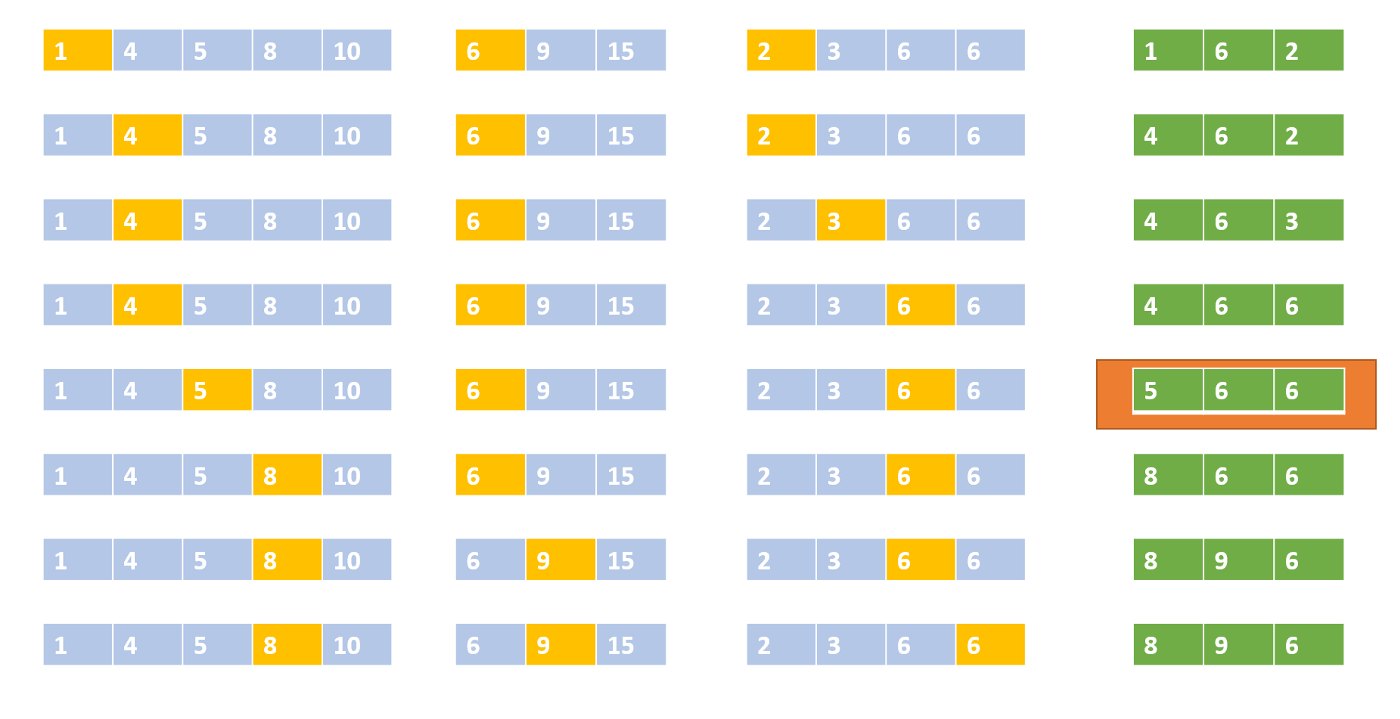

In [9]:
def solve(A, B, C):
    i, j, k = 0, 0, 0
    m, n, p = len(A), len(B), len(C)
    min_diff = abs(max(A[i], B[j], C[k]) - min(A[i], B[j], C[k]))
    while i < m and j < n and k < p:
        curr_diff = abs(max(A[i], B[j], C[k]) - min(A[i], B[j], C[k]))
        if curr_diff < min_diff:
            min_diff = curr_diff
        min_term = min(A[i], B[j], C[k])
        if A[i] == min_term:
            i += 1
        elif B[j] == min_term:
            j += 1
        else:
            k += 1
    return min_diff

A = [1,4,5,8,10]
B = [6,9,15]
C = [2,3,6,6]

print(solve(A, B, C))

1


**Problem No. 6:** Given n non-negative integers `a1, a2, ..., an ,` where each represents a point at coordinate `(i, ai)`. n vertical lines are drawn such that the two endpoints of the line i is at `(i, ai)` and `(i, 0)`. Find two lines, which, together with the x-axis forms a container, such that the container contains the most water.


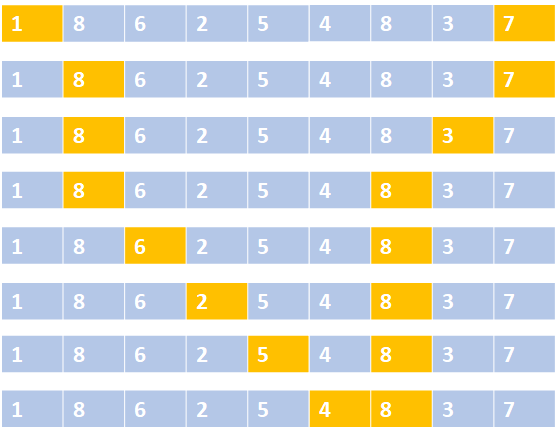

In [11]:
def maxArea(height):
    l, r, max_area  = 0, len(height)-1, 0
    while l<r:
        base = r-l
        if height[r] >= height[l]:
            h = height[l]
            l+=1
        else:
            h = height[r]
            r-=1
        print(l,r)
        if h * base > max_area:
            max_area = h * base
    return max_area

print(maxArea([1, 8, 6, 2, 5, 4, 8, 3, 7]))    

1 8
1 7
1 6
2 6
3 6
4 6
5 6
6 6
49
